### IMPORT LIBRARIES

#### 1. FOR LOADING DATASET 

In [1]:
import cv2
import os

#### 2. FOR VISUALIZING

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#### 3. FOR DATA PROCESSING

In [3]:
import numpy as np

#### 4. FOR BUILDING THE MODEL

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#### 5. FOR HYPERPARAMETER TUNING

In [5]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

#### 6. KERAS

In [6]:
from tensorflow import keras

### VISUALIZE THE DATA

#### Normal X-Ray Vs Pneumonia X-Ray

(-0.5, 127.5, 127.5, -0.5)

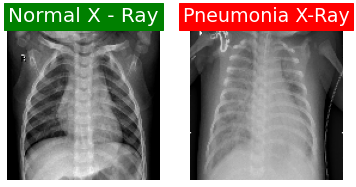

In [8]:
fig , axs = plt.subplots(1,2) 
img = cv2.imread(r"Dataset/chest_xray/chest_xray/train/NORMAL/IM-0117-0001.jpeg")
img = cv2.resize(img,(128,128))
axs[0].set_title("Normal X - Ray", 
          fontsize='20', 
          backgroundcolor='green', 
          color='white') 
axs[0].imshow(img)
axs[0].axis('off')
img = cv2.imread(r"Dataset/chest_xray/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg")
img = cv2.resize(img,(128,128))
axs[1].set_title("Pneumonia X-Ray", 
          fontsize='19', 
          backgroundcolor='Red', 
          color='white') 
axs[1].imshow(img)
axs[1].axis('off')

#### Dataset visualization
##### 1. Train DataSet

<BarContainer object of 2 artists>

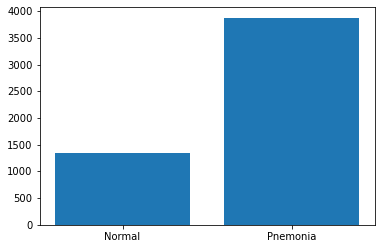

In [9]:
Attributes = ['Normal','Pnemonia']
count = [len(os.listdir("Dataset/chest_xray/chest_xray/train/NORMAL/")),len(os.listdir("Dataset/chest_xray/chest_xray/train/PNEUMONIA/"))]
plt.bar(Attributes,count)

##### 2. Test Dataset

<BarContainer object of 2 artists>

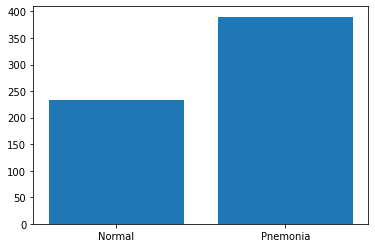

In [10]:
count = [len(os.listdir("Dataset/chest_xray/chest_xray/test/NORMAL/")),len(os.listdir("Dataset/chest_xray/chest_xray/test/PNEUMONIA/"))]
plt.bar(Attributes,count)

### LOAD THE DATA

#### Dataset Directory Inizialitation

In [11]:
directory = r"Dataset/chest_xray/chest_xray/"

#### Function for loading Dataset

In [12]:
x_train = []
x_test = []
y_train = []
y_test = []
def load(path , result , destination_x,destination_y):
        for image_name in os.listdir(directory + path):
            try:
                img = cv2.imread(directory+path+image_name)
                img = cv2.resize(img,(32,32))
                destination_x.append(img)
                destination_y.append(result)
            except Exception as e:
                print("",end="")
        print("Successfully Loaded data")

#### Loading Data to X and Y

#### 1. Loading Normal X_Ray Train Data 

In [13]:
load("train/NORMAL/",0,x_train,y_train)

Successfully Loaded data


#### 2. Loading Pneumonia X-Ray Train Data

In [14]:
load("train/PNEUMONIA/",1,x_train,y_train)

Successfully Loaded data


#### 3. Loading Normal X-Ray Test Data

In [15]:
load("test/NORMAL/",0,x_test,y_test)

Successfully Loaded data


#### 4. Loading Pneumonia X-Ray Test Data

In [16]:
load("test/PNEUMONIA/",1,x_test,y_test)

Successfully Loaded data


### PREPROCESSING THE DATA

#### Converting to Numpy Array

In [17]:
x_train = np.array(x_train)

In [18]:
y_train1=y_train
y_train = np.array(y_train).reshape((-1,1))

In [19]:
x_test = np.array(x_test)

In [20]:
y_test = np.array(y_test)

### BUILDING THE MODEL

In [21]:
def build_model(hp):
    model = keras.Sequential([
        keras.layers.Conv2D(
            filters = hp.Int('conv_1_filter' , min_value=64 , max_value=128,step=16),
            kernel_size=hp.Choice('conv_1_kernel', values=[3,5]),
            activation='relu',
            input_shape=(32,32,3),
        ),
        keras.layers.Conv2D(
            filters = hp.Int('conv_1_filter' , min_value=32 , max_value=64,step=16),
            kernel_size=hp.Choice('conv_2_kernel', values=[3,5]),
            activation='relu'
        ),
        keras.layers.Flatten(),
        keras.layers.Dense(
            units=hp.Int('dense_1_units',min_value=32,max_value=128,step=16),
            activation='relu'
        ),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [22]:
tuner_search = RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='output',project_name="Pneumonia_Prediction")

In [23]:
tuner_search.search(x_train,y_train,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 17s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 02m 06s
INFO:tensorflow:Oracle triggered exit


In [27]:
model = tuner_search.get_best_models(num_models=1)[0]

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 80)        2240      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 80)        160080    
_________________________________________________________________
flatten (Flatten)            (None, 54080)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                1730592   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,892,945
Trainable params: 1,892,945
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(x_train,y_train,epochs=10,validation_split=0.1,initial_epoch=3)

Epoch 4/10
147/147 [==============================] - 6s 31ms/step - loss: 0.5959 - accuracy: 0.7170 - val_loss: 0.3344 - val_accuracy: 1.0000
Epoch 5/10
147/147 [==============================] - 4s 27ms/step - loss: 0.6056 - accuracy: 0.7067 - val_loss: 0.3561 - val_accuracy: 1.0000
Epoch 6/10
147/147 [==============================] - 4s 28ms/step - loss: 0.5922 - accuracy: 0.7214 - val_loss: 0.3343 - val_accuracy: 1.0000
Epoch 7/10
147/147 [==============================] - 4s 28ms/step - loss: 0.5996 - accuracy: 0.7122 - val_loss: 0.3158 - val_accuracy: 1.0000
Epoch 8/10
147/147 [==============================] - 4s 28ms/step - loss: 0.6077 - accuracy: 0.7063 - val_loss: 0.3026 - val_accuracy: 1.0000
Epoch 9/10
147/147 [==============================] - 4s 28ms/step - loss: 0.5924 - accuracy: 0.7201 - val_loss: 0.3384 - val_accuracy: 1.0000
Epoch 10/10
147/147 [==============================] - 4s 28ms/step - loss: 0.5973 - accuracy: 0.7155 - val_loss: 0.3436 - val_accuracy: 1.000

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix

preds = model.predict(x_test)

acc = accuracy_score(y_test, np.round(preds))*100
cm = confusion_matrix(y_test, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

CONFUSION MATRIX ------------------
[[  0 234]
 [  0 390]]

TEST METRICS ----------------------
Accuracy: 62.5%
Precision: 62.5%
Recall: 100.0%
F1-score: 76.92307692307692
